# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
import tensorflow as tf
import pathlib
import os
import io
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report,confusion_matrix
warnings.filterwarnings('ignore')

# Dataset and EDA

In [2]:
dataset=pd.read_csv('/content/drive/MyDrive/Deep_learning/projet AT&T Spam Detector/spam.csv',encoding='ISO-8859-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df=dataset.copy()

In [6]:
#Les colonnes Unamed 2,3,4 qui sont majoritairement vides et ne servent à rien
# V1 : Target
# V2 : SMS
col_to_drop=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df=df.drop(col_to_drop,axis=1)

In [7]:
df=df.rename(columns={"v1": "Target", "v2": "SMS"})
df.head()

,Target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


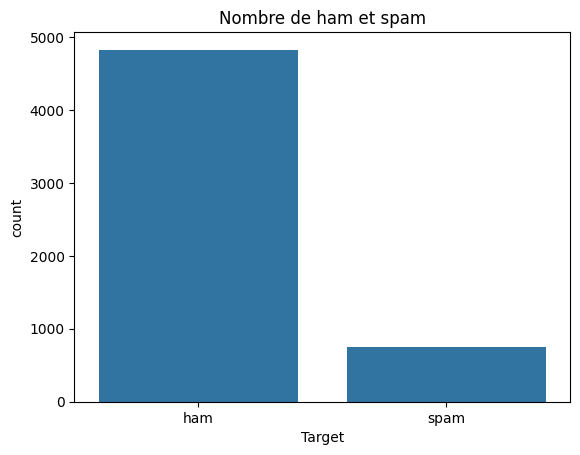

In [8]:
sns.countplot(data=df, x='Target')
plt.xlabel('Target')
plt.title('Nombre de ham et spam')
plt.show()

In [9]:
#pourcentage de ham et spam
pourcent= df['Target'].value_counts(normalize=True)*100
print(f"Le pourcentage de ham  : {pourcent[0].round(2)}%")
print(f"Le pourcentage de spam : {pourcent[1].round(2)}%")

Le pourcentage de ham  : 86.59%
Le pourcentage de spam : 13.41%


## Notre dataset est désiquilibré

In [10]:
df['Target']=df['Target'].map({'ham':0,'spam':1})

#Under Sampling

In [11]:
# ham_0_under = ham_0.sample(spam_1_count)
# test_under = pd.concat([ham_0_under, spam_1], axis=0)
# print(test_under['Target'].value_counts())
# test_under['Target'].value_counts().plot(kind='bar', title='count (target)')

In [12]:
#test_under.head()

# Over sampling

In [13]:
# spam_1_over = spam_1.sample(ham_0_count,replace=True)
# test_over = pd.concat([spam_1_over, ham_0], axis=0)
# print(test_over['Target'].value_counts())
# test_over['Target'].value_counts().plot(kind='bar', title='count (target)')

#Data preprocessing

In [14]:
#!pip install spacy -q

In [15]:
import spacy

In [16]:
!python -m spacy download en_core_web_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 62.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [17]:
nlp = spacy.load('en_core_web_sm')

In [18]:
from spacy.lang.en.stop_words import STOP_WORDS

In [19]:
#Supprimer tous les caractères des chaînes qui ne sont pas alphanumériques, à l'exception de '/\@!: qui peuvent caraterisé un spam.
df["SMS_clean"] = df["SMS"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" " or ch=="'/\@!:"))
#Remplacer les espaces doubles par des espaces simples et convertir tous les caractères en minuscules et coupez les espaces de début et de fin.
df["SMS_clean"] = df["SMS_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
#Remplacer tous les jetons des textes par lemma_ et supprimer tous les mots vides.
df["SMS_clean"] = df["SMS_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) and (token.text not in STOP_WORDS)]))
# #Supprimer tous les caractères des chaînes qui ne sont pas alphanumériques, à l'exception de '/\@!: qui peuvent caraterisé un spam.
# test_over["SMS_clean"] = test_over["SMS"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" " or ch=="'/\@!:"))
# #Remplacer les espaces doubles par des espaces simples et convertir tous les caractères en minuscules et coupez les espaces de début et de fin.
# test_over["SMS_clean"] = test_over["SMS_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
# #Remplacer tous les jetons des textes par lemma_ et supprimer tous les mots vides.
# test_over["SMS_clean"] = test_over["SMS_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) and (token.text not in STOP_WORDS)]))



In [20]:
df.head()
#test_over.head()

,Target,SMS,SMS_clean
0,0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think usf live


In [21]:
# Encodage des SMS
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token="out_of_vocab")
tokenizer.fit_on_texts(df['SMS_clean'])
df["SMS_encoded"] = tokenizer.texts_to_sequences(df['SMS_clean'])
df["len_SMS"] = df["SMS_encoded"].apply(lambda x: len(x))
df = df[df["len_SMS"] != 0]
# tokenizer.fit_on_texts(test_over['SMS_clean'])
# test_over["SMS_encoded"] = tokenizer.texts_to_sequences(test_over['SMS_clean'])
# test_over["len_SMS"] = test_over["SMS_encoded"].apply(lambda x: len(x))
# test_over = test_over[test_over["len_SMS"] != 0]

In [22]:
df.head()
#test_over.head()

,Target,SMS,SMS_clean,SMS_encoded,len_SMS
0,0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,"[1, 230, 446, 462, 941, 36, 52, 204, 942, 79, ...",14
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,"[10, 195, 463, 289, 2, 1]",6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[13, 299, 4, 532, 663, 34, 1, 850, 422, 1, 1, ...",22
3,0,U dun say so early hor... U c already then say...,u dun early hor u c,"[2, 125, 150, 1, 2, 85]",6
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think usf live,"[708, 23, 664, 129]",4


In [23]:
#Ajouter un remplissage nul à la fin des séquences pour qu'elles aient toutes la même longueur
SMS_pad = tf.keras.preprocessing.sequence.pad_sequences(df.SMS_encoded, padding="post")
#SMS_pad = tf.keras.preprocessing.sequence.pad_sequences(test_over.SMS_encoded, padding="post")

In [24]:
# Définir les ensembles d'entraînement et de validation pour le randomforestclassifier et embedding
#RFC
X_train, X_test, y_train, y_test = train_test_split(SMS_pad, df.Target, test_size=0.3,random_state=42)
#Emb
X_train_em, X_valtest, y_train_em, y_valtest = train_test_split(SMS_pad, df.Target, test_size=0.3,random_state=42)
X_test_em, X_val_em, y_test_em, y_val_em = train_test_split(X_valtest, y_valtest, test_size=0.5,random_state=42)

# Baseline model

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf = RandomForestClassifier(class_weight='balanced',random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [27]:
print(f"Accuracy = {accuracy_score(y_test, y_pred).round(2)}")

Accuracy = 0.92


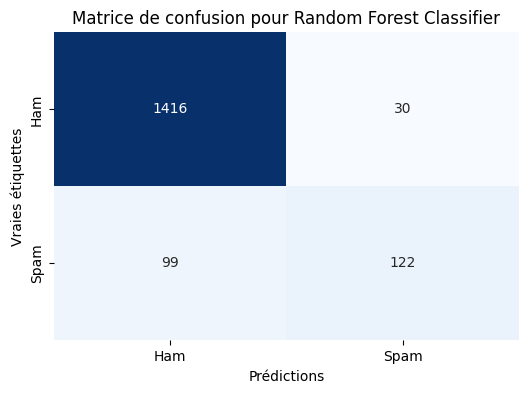

In [28]:
# La matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'], cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion pour Random Forest Classifier')
plt.show()

In [29]:
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1446
           1       0.80      0.55      0.65       221

    accuracy                           0.92      1667
   macro avg       0.87      0.77      0.81      1667
weighted avg       0.92      0.92      0.92      1667



# Embedding model

In [31]:
#Calcul de poids de classe
cls_weights = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train_em), y=y_train_em)
cls_weight_dict = {0: cls_weights[0], 1: cls_weights[1]}
val_sample_weights = class_weight.compute_sample_weight(cls_weight_dict, y_val_em)

In [32]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(1000, 16, name="embedding"),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation="sigmoid")
])


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          16000     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 16417 (64.13 KB)
Trainable params: 16417 (64.13 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [34]:
# Compilation et entraînement du modèle
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'],weighted_metrics=['accuracy'])

In [35]:
history_embedding = model.fit(X_train_em, y_train_em, epochs=100, batch_size=32, verbose=1,validation_data=(X_val_em, y_val_em, val_sample_weights),callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/100
122/122 [==============================] - 1s 5ms/step - loss: 0.5936 - accuracy: 0.8475 - weighted_accuracy: 0.8475 - val_loss: 0.8060 - val_accuracy: 0.8633 - val_weighted_accuracy: 0.4970
Epoch 2/100
122/122 [==============================] - 0s 3ms/step - loss: 0.3735 - accuracy: 0.8647 - weighted_accuracy: 0.8647 - val_loss: 0.9646 - val_accuracy: 0.8633 - val_weighted_accuracy: 0.4970
Epoch 3/100
122/122 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.8647 - weighted_accuracy: 0.8647 - val_loss: 0.9047 - val_accuracy: 0.8633 - val_weighted_accuracy: 0.4970
Epoch 4/100
122/122 [==============================] - 0s 3ms/step - loss: 0.2977 - accuracy: 0.8647 - weighted_accuracy: 0.8647 - val_loss: 0.7368 - val_accuracy: 0.8633 - val_weighted_accuracy: 0.4970
Epoch 5/100
122/122 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.8922 - weighted_accuracy: 0.8922 - val_loss: 0.4362 - val_accuracy: 0.9424 - val_weighted_ac

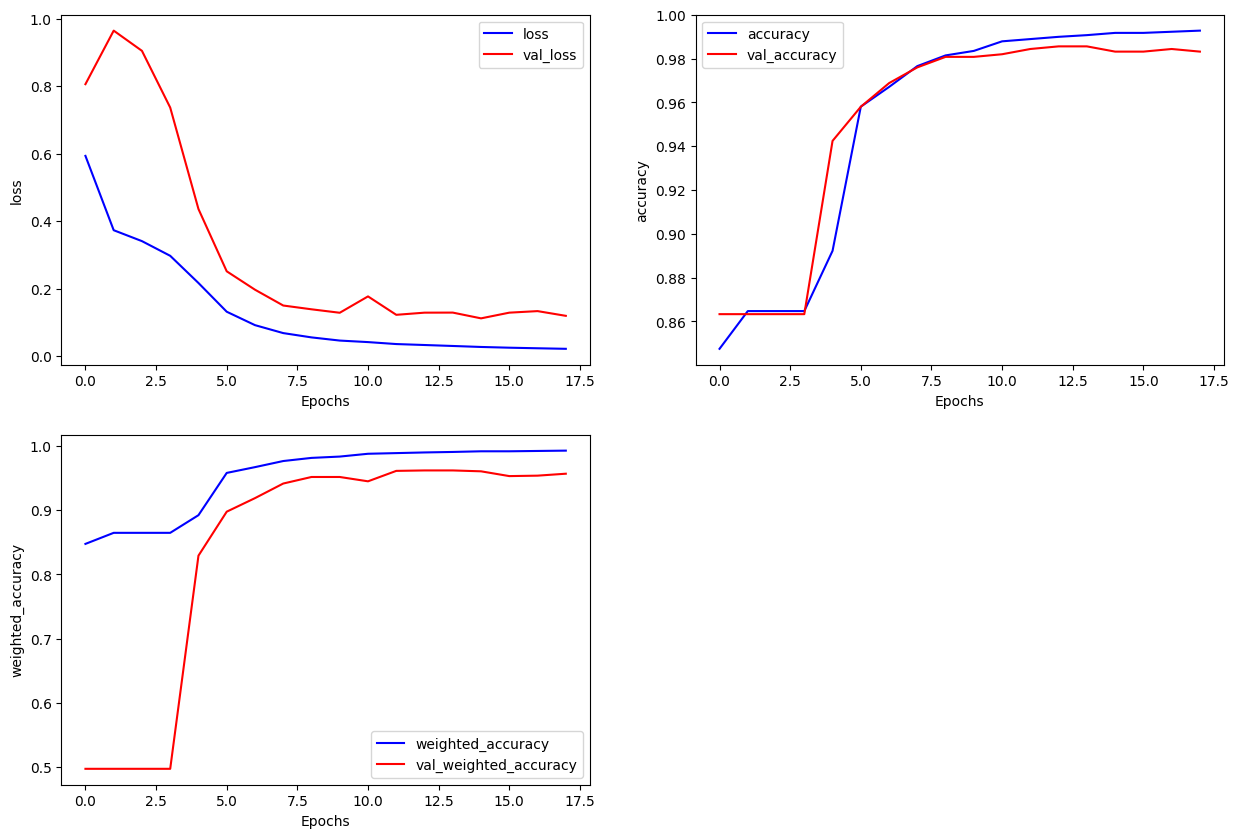

In [36]:
# Visualization of the training process on the loss function
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(history_embedding.history["loss"], color="b")
plt.plot(history_embedding.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend(labels=['loss','val_loss'])
# Visualization of accuracy training
plt.subplot(2, 2, 2)
plt.plot(history_embedding.history["accuracy"], color="b")
plt.plot(history_embedding.history["val_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.legend(labels=['accuracy','val_accuracy'])
# Visualization of recall training
plt.subplot(2,2,3)
plt.plot(history_embedding.history["weighted_accuracy"], color="b")
plt.plot(history_embedding.history["val_weighted_accuracy"], color="r")
plt.ylabel("weighted_accuracy")
plt.xlabel("Epochs")
plt.legend(labels=['weighted_accuracy','val_weighted_accuracy'])
plt.show()


In [37]:
# Prédiction sur les données de validation
y_pred_prob = model.predict(X_val_em, batch_size=32, verbose=2)
# Convertir les probabilités en classes prédites (0 ou 1)
y_pred = (y_pred_prob > 0.5).astype(int)

Accuracy = accuracy_score(y_val_em, y_pred)
Weighted_accuracy = accuracy_score(y_val_em, y_pred,sample_weight=val_sample_weights)
print(f"Accuracy = {Accuracy.round(2)}")
print(f"Weighted_accuracy = {Weighted_accuracy.round(2)}")

27/27 [==============================] - 0s 1ms/step
sklearn_accuracy=0.983
sklearn_weighted_accuracy=0.957


In [ ]:
print(f"Classification Report:\n {classification_report(y_val_em, y_pred)}")

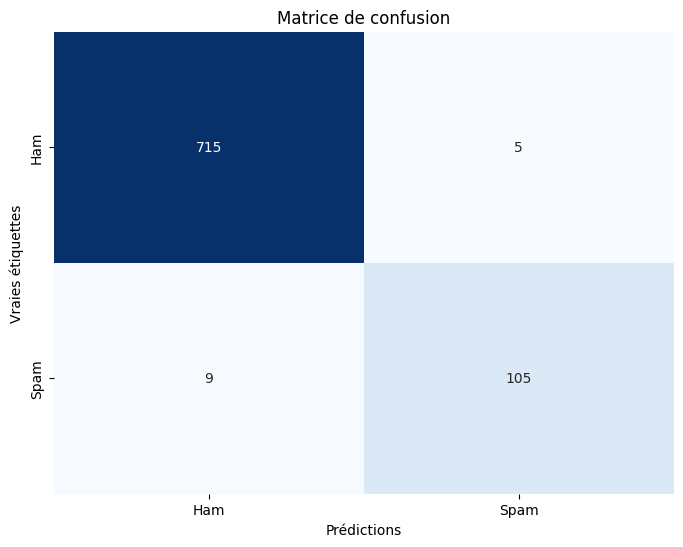

In [38]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_val_em, y_pred)
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'], cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()


# J'obtiens de meilleurs resultats avec le modèle embedding

In [40]:
# Sauvegarde du modèle
model.save('/content/drive/MyDrive/Deep_learning/projet AT&T Spam Detector/AT&T_Spam.h5')

In [41]:
# Chargement du modèle
from keras.models import load_model
model_s = load_model('/content/drive/MyDrive/Deep_learning/projet AT&T Spam Detector/AT&T_Spam.h5')

In [42]:
# Using model on validation batch
history = model_s.fit(X_train_em, y_train_em, epochs=100, batch_size=32,
                      verbose=2,validation_data=(X_test_em, y_test_em))

Epoch 1/100
122/122 - 1s - loss: 0.0216 - accuracy: 0.9936 - weighted_accuracy: 0.9936 - val_loss: 0.0504 - val_accuracy: 0.9868 - val_weighted_accuracy: 0.9868 - 896ms/epoch - 7ms/step
Epoch 2/100
122/122 - 0s - loss: 0.0202 - accuracy: 0.9931 - weighted_accuracy: 0.9931 - val_loss: 0.0496 - val_accuracy: 0.9868 - val_weighted_accuracy: 0.9868 - 406ms/epoch - 3ms/step
Epoch 3/100
122/122 - 0s - loss: 0.0188 - accuracy: 0.9938 - weighted_accuracy: 0.9938 - val_loss: 0.0522 - val_accuracy: 0.9856 - val_weighted_accuracy: 0.9856 - 328ms/epoch - 3ms/step
Epoch 4/100
122/122 - 0s - loss: 0.0182 - accuracy: 0.9949 - weighted_accuracy: 0.9949 - val_loss: 0.0534 - val_accuracy: 0.9856 - val_weighted_accuracy: 0.9856 - 353ms/epoch - 3ms/step
Epoch 5/100
122/122 - 0s - loss: 0.0168 - accuracy: 0.9956 - weighted_accuracy: 0.9956 - val_loss: 0.0517 - val_accuracy: 0.9868 - val_weighted_accuracy: 0.9868 - 355ms/epoch - 3ms/step
Epoch 6/100
122/122 - 0s - loss: 0.0160 - accuracy: 0.9954 - weighted_

In [47]:
# Évaluation sur l'ensemble de test
test_loss, test_accuracy,test_weighted_accuracy = model_s.evaluate(X_test_em,y_test_em)

27/27 [==============================] - 0s 2ms/step - loss: 0.1208 - accuracy: 0.9700 - weighted_accuracy: 0.9700


In [48]:
# Prédiction sur les données de validation
y_pred_prob = model.predict(X_test_em, batch_size=32, verbose=2)
# Convertir les probabilités en classes prédites (0 ou 1)
y_pred = (y_pred_prob > 0.5).astype(int)

27/27 - 0s - 49ms/epoch - 2ms/step
Accuracy = 0.99
Weighted_accuracy = 0.99


In [51]:
print(f"Classification Report:\n {classification_report(y_test_em, y_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       726
           1       0.96      0.93      0.95       107

    accuracy                           0.99       833
   macro avg       0.98      0.96      0.97       833
weighted avg       0.99      0.99      0.99       833



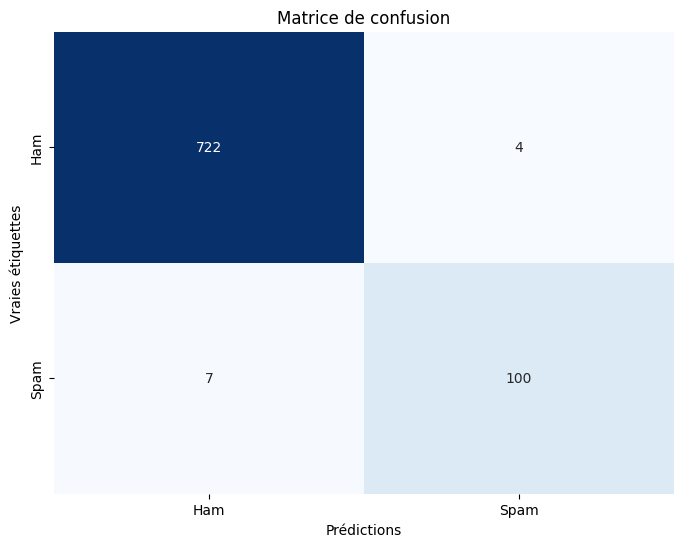

In [50]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test_em, y_pred)
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'], cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()
